<h1><center>Industry Application of Analytics </center></h1>

![](https://media.giphy.com/media/3oKIPEqDGUULpEU0aQ/giphy.gif)

# Topics
1. Introduction to Business Analytics. 
2. Basic Statistics 
3. Exploratory Data Analysis with pandas
4. Data Visualization with Seaborn (optional) 
5. Modelling with python:- 
    - Regression 
        - Linear Regression 
    - Classification
        - Logistic Regression (We meet again !)
        - Decision Tree <------------------------------------------------ **This is where we are**
    - Analysing our models
6. Churn Analysis
7. Social Media Analytics
    - Web Scraping
8. Marketing Analytics (maybe !)
9. Time Series Forecasting (maybe maybe !!)
10. Supply Chain Analytics (maybe maybe maybe !!!)

# Decision Tree Regressor

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [50]:
df = pd.read_csv('datasets/decision_tree_regressor_data1.csv')
df2 = pd.read_csv('datasets/decision_tree_regressor_data2.csv')

In [51]:
df

,Outlook,Temperature,Humidity,Windy,Hours Played
0,Rainy,Hot,High,False,26
1,Rainy,Hot,High,True,30
2,Overcast,Hot,High,False,48
3,Sunny,Mild,High,False,46
4,Sunny,Cool,Normal,False,52
5,Sunny,Cool,Normal,True,23
6,Overcast,Cool,Normal,True,43
7,Rainy,Mild,High,False,36
8,Rainy,Cool,Normal,False,38
9,Sunny,Mild,Normal,False,48


In [52]:
df2

,Temperature,Hours Played
0,52,26
1,30,30
2,24,48
3,33,46
4,44,52
5,41,23
6,39,43
7,37,36
8,26,38
9,48,48


# Let's look at data 1 

In [8]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Hours Played'], dtype='object')

In [9]:
X = df[['Outlook', 'Temperature', 'Humidity', 'Windy']]

In [11]:
y = df['Hours Played']

In [12]:
X

,Outlook,Temperature,Humidity,Windy
0,Rainy,Hot,High,False
1,Rainy,Hot,High,True
2,Overcast,Hot,High,False
3,Sunny,Mild,High,False
4,Sunny,Cool,Normal,False
5,Sunny,Cool,Normal,True
6,Overcast,Cool,Normal,True
7,Rainy,Mild,High,False
8,Rainy,Cool,Normal,False
9,Sunny,Mild,Normal,False


In [13]:
y

0     26
1     30
2     48
3     46
4     52
5     23
6     43
7     36
8     38
9     48
10    48
11    62
12    44
13    30
Name: Hours Played, dtype: int64

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
clf = DecisionTreeRegressor()

In [16]:
clf = clf.fit(X, y)

ValueError: could not convert string to float: 'Rainy'

# We have to encode !!

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [18]:
le.fit(df['Outlook'])

LabelEncoder()

In [20]:
le.transform(df['Outlook'])

array([1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2])

In [21]:
le.transform(['Sunny'])

array([2])

In [22]:
col_list = ['Outlook', 'Temperature', 'Humidity', 'Windy']

In [23]:
for i in col_list:
    df[i] = le.fit_transform(df[i])

In [24]:
df

,Outlook,Temperature,Humidity,Windy,Hours Played
0,1,1,0,0,26
1,1,1,0,1,30
2,0,1,0,0,48
3,2,2,0,0,46
4,2,0,1,0,52
5,2,0,1,1,23
6,0,0,1,1,43
7,1,2,0,0,36
8,1,0,1,0,38
9,2,2,1,0,48


In [26]:
X = df[['Outlook', 'Temperature', 'Humidity', 'Windy']]

In [28]:
y = df['Hours Played']

In [29]:
X

,Outlook,Temperature,Humidity,Windy
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [30]:
y

0     26
1     30
2     48
3     46
4     52
5     23
6     43
7     36
8     38
9     48
10    48
11    62
12    44
13    30
Name: Hours Played, dtype: int64

In [31]:
clf = DecisionTreeRegressor()

In [32]:
clf = clf.fit(X, y)

In [33]:
clf

DecisionTreeRegressor()

In [34]:
X

,Outlook,Temperature,Humidity,Windy
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


# Plotting the decision tree

[Text(0.38095238095238093, 0.9166666666666666, 'X[0] <= 0.5\nsquared_error = 112.286\nsamples = 14\nvalue = 41.0'),
 Text(0.14285714285714285, 0.75, 'X[1] <= 1.5\nsquared_error = 57.688\nsamples = 4\nvalue = 49.25'),
 Text(0.09523809523809523, 0.5833333333333334, 'X[2] <= 0.5\nsquared_error = 4.667\nsamples = 3\nvalue = 45.0'),
 Text(0.047619047619047616, 0.4166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 48.0'),
 Text(0.14285714285714285, 0.4166666666666667, 'X[3] <= 0.5\nsquared_error = 0.25\nsamples = 2\nvalue = 43.5'),
 Text(0.09523809523809523, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 44.0'),
 Text(0.19047619047619047, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 43.0'),
 Text(0.19047619047619047, 0.5833333333333334, 'squared_error = 0.0\nsamples = 1\nvalue = 62.0'),
 Text(0.6190476190476191, 0.75, 'X[2] <= 0.5\nsquared_error = 96.01\nsamples = 10\nvalue = 37.7'),
 Text(0.42857142857142855, 0.5833333333333334, 'X[1] <= 1.5\nsquared_error = 48.64\nsamples = 

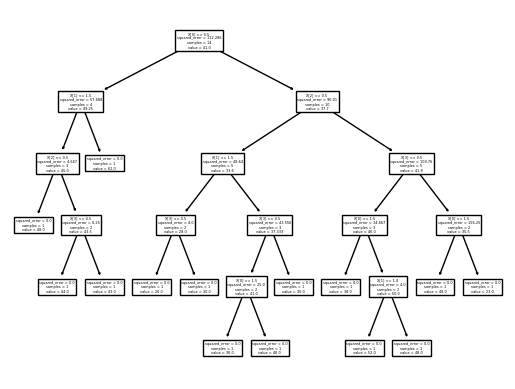

In [36]:
from sklearn import tree
tree.plot_tree(clf)

# Too small !!

,Temperature
0,52
1,30
2,24
3,33
4,44
5,41
6,39
7,37
8,26
9,48


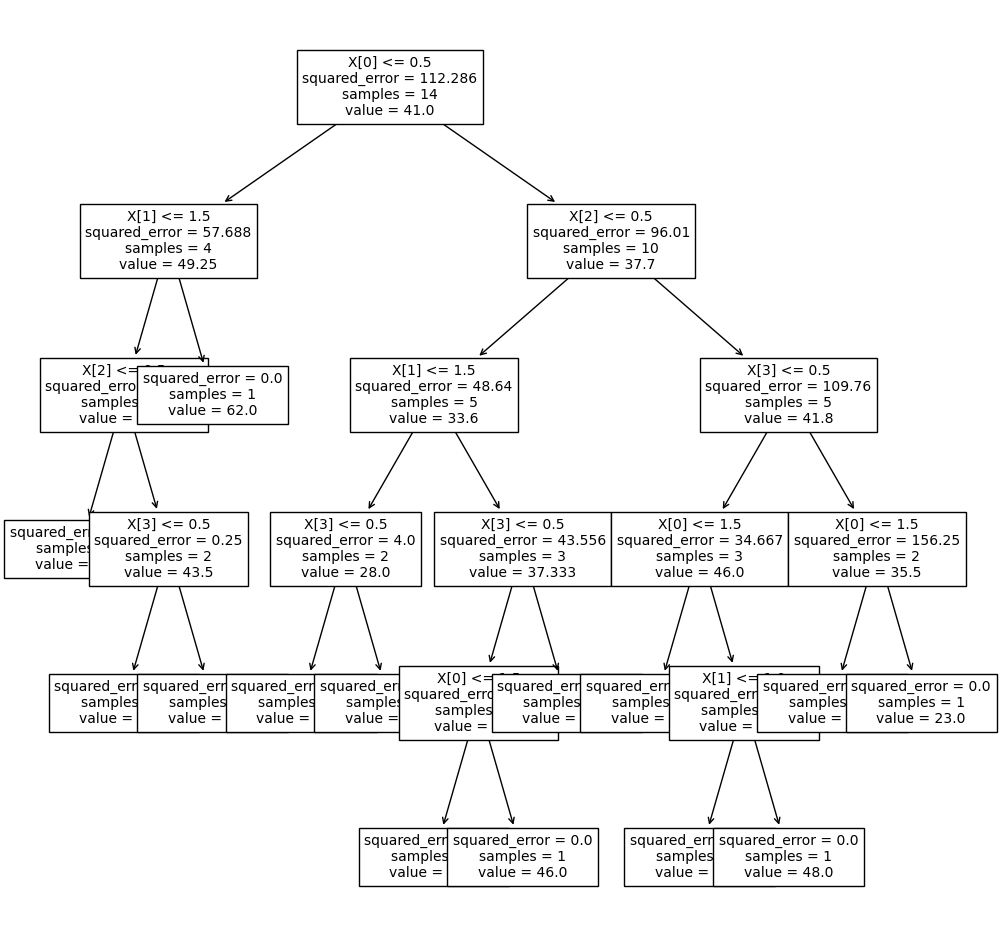

In [38]:
# plot tree
import matplotlib.pyplot as plt


plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

# Dataset 2

In [54]:
df2

,Temperature,Hours Played
0,52,26
1,30,30
2,24,48
3,33,46
4,44,52
5,41,23
6,39,43
7,37,36
8,26,38
9,48,48


In [55]:
X = df2[['Temperature']]

y = df['Hours Played']

In [56]:
clf2 = DecisionTreeRegressor()

In [57]:
clf2 = clf2.fit(X, y)

In [58]:
clf2

DecisionTreeRegressor()

In [59]:
X

,Temperature
0,52
1,30
2,24
3,33
4,44
5,41
6,39
7,37
8,26
9,48


# Plotting the decision tree

[Text(0.6, 0.9375, 'X[0] <= 50.0\nsquared_error = 112.286\nsamples = 14\nvalue = 41.0'),
 Text(0.55, 0.8125, 'X[0] <= 35.5\nsquared_error = 102.284\nsamples = 13\nvalue = 42.154'),
 Text(0.35, 0.6875, 'X[0] <= 33.5\nsquared_error = 83.265\nsamples = 7\nvalue = 45.143'),
 Text(0.3, 0.5625, 'X[0] <= 29.0\nsquared_error = 41.889\nsamples = 6\nvalue = 42.333'),
 Text(0.2, 0.4375, 'X[0] <= 27.0\nsquared_error = 16.75\nsamples = 4\nvalue = 44.5'),
 Text(0.15, 0.3125, 'X[0] <= 25.0\nsquared_error = 16.889\nsamples = 3\nvalue = 43.333'),
 Text(0.1, 0.1875, 'X[0] <= 23.0\nsquared_error = 4.0\nsamples = 2\nvalue = 46.0'),
 Text(0.05, 0.0625, 'squared_error = 0.0\nsamples = 1\nvalue = 44.0'),
 Text(0.15, 0.0625, 'squared_error = 0.0\nsamples = 1\nvalue = 48.0'),
 Text(0.2, 0.1875, 'squared_error = 0.0\nsamples = 1\nvalue = 38.0'),
 Text(0.25, 0.3125, 'squared_error = 0.0\nsamples = 1\nvalue = 48.0'),
 Text(0.4, 0.4375, 'X[0] <= 31.5\nsquared_error = 64.0\nsamples = 2\nvalue = 38.0'),
 Text(0.35, 

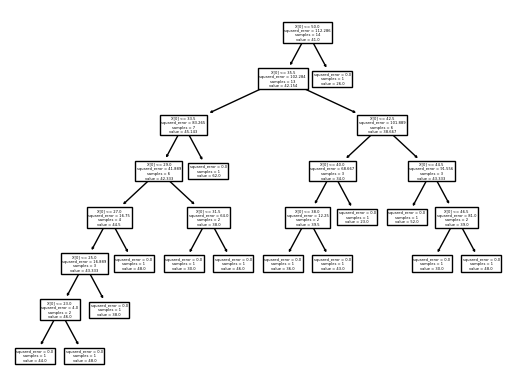

In [60]:
from sklearn import tree
tree.plot_tree(clf2)

# Too small !!

In [63]:
X

,Temperature
0,52
1,30
2,24
3,33
4,44
5,41
6,39
7,37
8,26
9,48


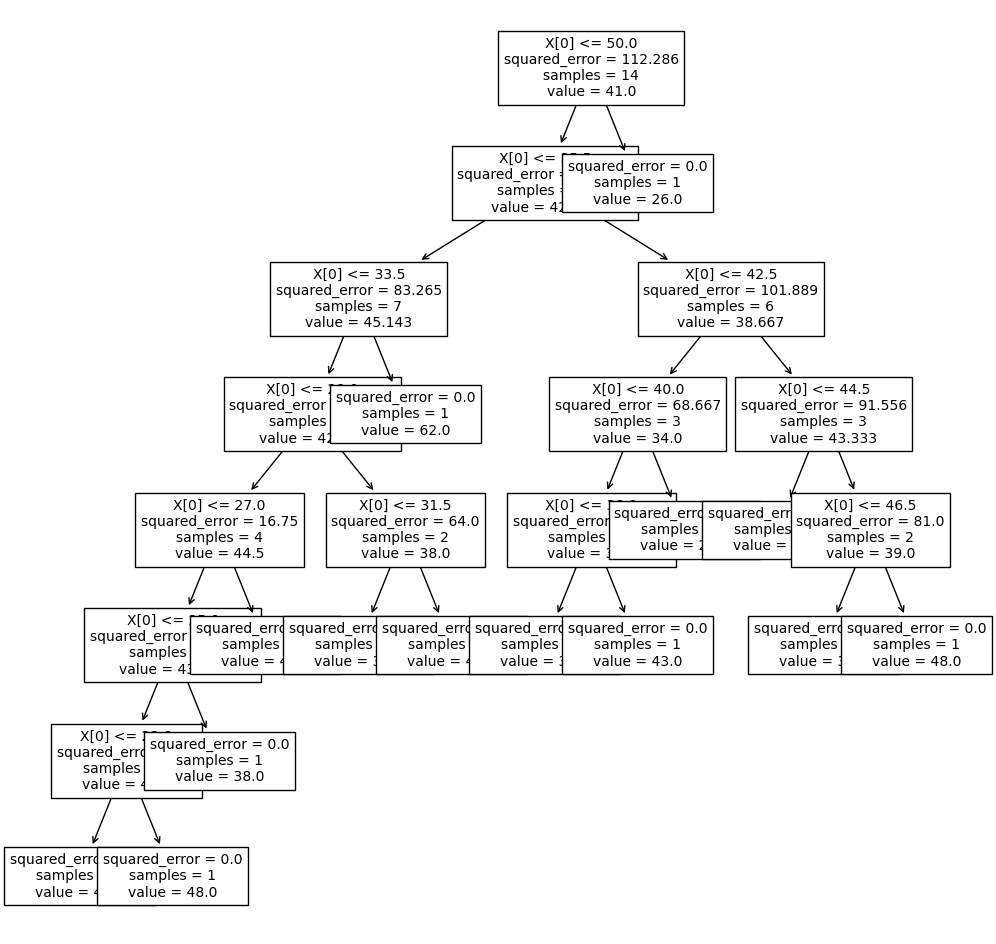

In [62]:
# plot tree
import matplotlib.pyplot as plt


plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf2, fontsize=10)
plt.show()